<a href="https://colab.research.google.com/github/esriverav1/BigData/blob/main/RegresionLineal_EdwinRiveraVelandia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Regresión Lineal

Realizado por: Edwin Stiven Rivera Velandia

##Introducción

La regresión lineal se enfoca en la aproximación de la relación de dependencia entre una variable endógena, o independiente **Y**, y $m$ variables exógenas, o independientes **$X_{i}$**. La relación es expresada en un modelo matepmatico, espresado como:

$$Y={\beta }_{0}+{\beta }_{1}X_{1}+{\beta }_{2}X_{2}+...+{\beta }_{m}X_{m}$$


Donde ${\beta }_{1},{\beta }_{2},...,{\beta }_{k}$ son los parámetros asociados a cada una de las $k$ variables independiente, y miden la influencia de cada variable $X_{i}$ sobre la variable de respuesta, y ${\beta }_{0}$ es el parámetro asociado al intercepto.

##Marco histórico

La primera forma de regresión lineal documentada fue el método de los mínimos cuadrados que fue publicada por Legendre en 1805, Gauss publicó un trabajo en donde desarrollaba de manera más profunda el método de los mínimos cuadrados,1​ y en dónde se incluía una versión del teorema de Gauss-Márkov.

Francis Galton acuñó el término regresión. En un famoso ensayo, Galton planteó que, a pesar de la tendencia de los padres de estatura alta a procrear hijos altos y los padres de estatura baja, hijos bajos, la estatura promedio de los niños de padres de una estatura determinada  tendía a desplazarse, es decir, la estatura de los hijos de padres inusualmente altos o inusualmente bajos tiende a dirigirse a la estatura promedio de la población. La ley de regresión universal de Galton fue confirmada por Karl Pearson, quien consolidò más de mil registros de estaturas de miembros de grupos familiares concluyò que se trata de un fenómeno por el cual los hijos altos e hijos bajos “regresan” por igual a la estatura promedio de todos los demás.


##Planteamiento del algoritmo

Dado que el valor de los parámetros ${\beta }_{0},{\beta }_{1},...,{\beta }_{m}$ asociados a cada una de las $k$ variables exógenas y el parámetros asociado al intercepto son desconocidos, éstos se pueden estimar mediante los datos obtenidos de una muestra.

Suponga que se cuenta con $n>k$ observaciones, siendo k el número de variables regresoras, cada observación $(x_{i1},x_{i2},...,x_{im},y_{i})$ satisface el modelo de la ecuación:

$$y_{i}={\beta }_{0}+{\beta }_{i1}x_{1}+{\beta }_{2}x_{i2}+...+{\beta }_{k}x_{ik}+e_{i}$$
$$\beta_{0}+ \sum_{i=1}^{k} \beta_{i}x_{ij}+e_{i}$$
con $i=1,2,,...,n$

la suma de cuadrados de los errores, SCE, expresada en forma matricial, es:

$$\sum_{i=1}^{n}e_{i}^{2}=\sum_{i=1}^{n} (y_{i}-\beta_{0}-\sum_{j=1}^{k}\beta_{ij})^2$$
$$SCE= \varepsilon^{t} \varepsilon = (Y-X \beta)^T(Y-X \beta)$$

Donde $\varepsilon$ corresponde al vector de diferencias entre el valor real y el valor estimado de la variable respuesta: 
$$\varepsilon = Y-\hat{Y}$$
$$\hat{Y}=Y-X(X^{T}X)^{-1}XY$$

La matriz $X(X^{T}X)^{-1}X$ se denomina como $H$. Ahora, se minimiza la SCE con respecto a ${\beta }_{0}+{\beta }_{1}+{\beta }_{2}+...+{\beta }_{k}$, de tal manera que la estimación de los $k$ parámetros asociados a las $k$ variables regresoras y el parámetro ${\beta }_{0}$ asociado al intercepto están dados por la siguiente expresión:

$$\hat{\beta}=(X^{T}X)^{-1}XY$$

##Aplicación en datos

En la fabricación de productos comerciales de madera es importante estimar la relación que hay entre la densidad de un producto de madera y su rigidez.Como caso de estudio, se toma el estudio "Investigation of Certain Mechanical Properties of a Wood-Foam Composite" (Tesis para el doctorado, Departamento de Bosques y Vida Silvestre, University of Massachusetts) realizado por Terrance E. Conners r, en el cual se produjeron 30 tableros de aglomerado con densidades (denominada como variable regresora $x$) que variaban aproximadamente de 8 a 26 libras por pie cúbico y se midió su rigidez (variable respuesta $y$) en libras por pulgada cuadrada.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf

x = [9.50,9.80,8.30,8.60,7.00,17.40,15.20,16.70,15.00,14.80,25.60,24.40,19.50,
     22.80,19.80,8.40,11.00,9.90,6.40,8.20,15.00,16.40,15.40,14.50,13.60,23.40,
     23.30,21.20,21.70,21.30]
y = [14814.00,14007.00,7573.00,9714.00,5304.00,43243.00,28028.00,49499.00,
     26222.00,26751.00,96305.00,72594.00,32207.00,70453.00,38138.00,17502.00,
     19443.00,14191.00,8076.00,10728.00,25319.00,41792.00,25312.00,22148.00,
     18036.00,104170.00,49512.00,48218.00,47661.00,53045.00]

datos = pd.DataFrame({'x': x, 'y': y})
datos.head()
datos.shape

(30, 2)

En primera instancia, se representan los datos en un diagrama de dispersión para poder determinar, de manera preliminar, si existe una relación entre las variables estudiadas, y si existe, cuantificar y evaluar la significancia estadística de dicha relación, mediante el coeficiente de correlación de Pearson.

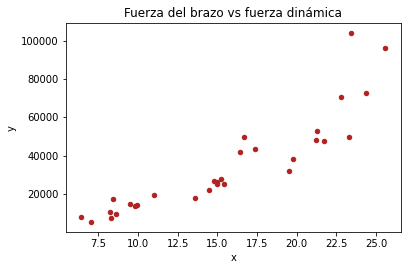

In [ ]:
fig, ax = plt.subplots(figsize=(6, 3.84))

datos.plot(
    x    = 'x',
    y    = 'y',
    c    = 'firebrick',
    kind = "scatter",
    ax   = ax
)
ax.set_title('Fuerza del brazo vs fuerza dinámica');

In [ ]:
# Correlación lineal entre las dos variables
# ==============================================================================
corr_test = pearsonr(x = datos['x'], y =  datos['y'])
print("Coeficiente de correlación de Pearson: ", corr_test[0])
print("P-value: ", corr_test[1])

Coeficiente de correlación de Pearson:  0.8930050637838879
P-value:  3.245136770663413e-11


El gráfico y posterior test de correlación muestran una relación lineal, de aproximadamente 0.89, según el coeficiente de correlación, y significativa según el p.valor asociado al test de correlación. Por tanto, tiene sentido la generación de un modelo de regresión lineal para la predicción de la rigidez de los aglomerados de madera en función de la densidad.

###Ajuste del modelo

Se realiza el ajuste de un modelo tomando como variable explicativa la densidad de aglomerados de madera y como variable dependiente la rigidez. Además estimar los parámetros asociados al modelo, es importante cuantificar la capacidad de predicción para nuevas observaciones. Para realizar dicha evaluación, se dividen los datos en dos (2) grupos, uno de entrenamiento y otro de evaluación.

In [ ]:
# División de los datos en train y test
# ==============================================================================
X = datos[['x']]
y = datos['y']

X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1000,
                                        shuffle      = True
                                    )

# Creación del modelo
# ==============================================================================
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     103.6
Date:                Sat, 13 Mar 2021   Prob (F-statistic):           8.75e-10
Time:                        22:37:28   Log-Likelihood:                -252.53
No. Observations:                  24   AIC:                             509.1
Df Residuals:                      22   BIC:                             511.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.024e+04   5445.238     -3.718      0.0

El modelo ajustado es expresado como:
$$\hat{y}=-20243.322+3480.8072x$$

Con un coeficiente de determinación de 0.825, intepretado como que el 82.5% de la variabilidad en la rigidez de los aglomerados de madera es explicada por la densidad.

Por último, se grafica la curva ajustada vía mínimos cuadrados ordinarios, incluyendo los límites inferior y superior del intervalo de confianza del 95% para la predicción:

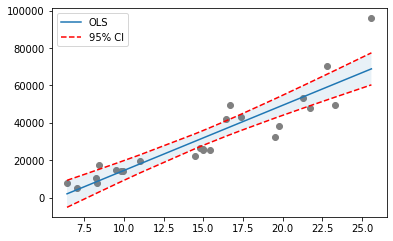

In [ ]:
# Predicciones con intervalo de confianza del 95%
# ==============================================================================
predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones.head(4)
# ==============================================================================
predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones['x'] = X_train[:, 1]
predicciones['y'] = y_train
predicciones = predicciones.sort_values('x')

# Gráfico del modelo
# ==============================================================================
fig, ax = plt.subplots(figsize=(6, 3.84))

ax.scatter(predicciones['x'], predicciones['y'], marker='o', color = "gray")
ax.plot(predicciones['x'], predicciones["mean"], linestyle='-', label="OLS")
ax.plot(predicciones['x'], predicciones["mean_ci_lower"], linestyle='--', color='red', label="95% CI")
ax.plot(predicciones['x'], predicciones["mean_ci_upper"], linestyle='--', color='red')
ax.fill_between(predicciones['x'], predicciones["mean_ci_lower"], predicciones["mean_ci_upper"], alpha=0.1)
ax.legend();

##Conclusiones


> Si bien el modelo de regresión lineal ajustado vía mínimos cuadrados ordinarios explica apropiadamente la variabilidad de la rigidez de aglomerados de madera, en función de la densidad, puede ser usado para realizar predicciones simples o generar un acercamiento a la magnitud o rango del valor real de la variable estudiada.


> Los parámetros asociados al intercepto del modelo y a la variable exógena son significativos estadísticamente, con una confianza del 95%.






##Referencias bibliográficas



*   Gujarati, D., & Porter, D. (2009). Econometría (5 ed.).
*   Montgomery, D., & Runger, G. (2003). Probabilidad y estadística aplicadas a la ingeniería.
*   Walpole, R., Myers, R., Myers, S., & Ye, K. (2012). Probabilidad y estadística para ingeniería y ciencias.
*   Regresión lineal con python, https://www.cienciadedatos.net/documentos/py10-regresion-lineal-python.html

 



